<a href="https://colab.research.google.com/github/muhammadhafiz27/Deep-Learning/blob/main/Gated_Recurrent_Unit_(GRU)_untuk_Prediksi_Data_Sekuensial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

# **Membuat dataset sinusoidal**

In [2]:
data = np.sin(np.linspace(0, 100, 1000))
seq_length = 20

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, seq_length)
X = torch.FloatTensor(X).unsqueeze(-1)
y = torch.FloatTensor(y).unsqueeze(-1)

# **Definisi model GRU**

In [3]:
class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# **Inisialisasi model, loss, optimizer**

In [4]:
model = GRUModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# **Training loop**

In [5]:
epochs = 50
losses = []

start_time = time.time()

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

end_time = time.time()
training_time = end_time - start_time
print(f'Total training time: {training_time:.2f} seconds')

Epoch [10/50], Loss: 0.0187
Epoch [20/50], Loss: 0.0053
Epoch [30/50], Loss: 0.0011
Epoch [40/50], Loss: 0.0001
Epoch [50/50], Loss: 0.0001
Total training time: 7.03 seconds


# **Plot loss**

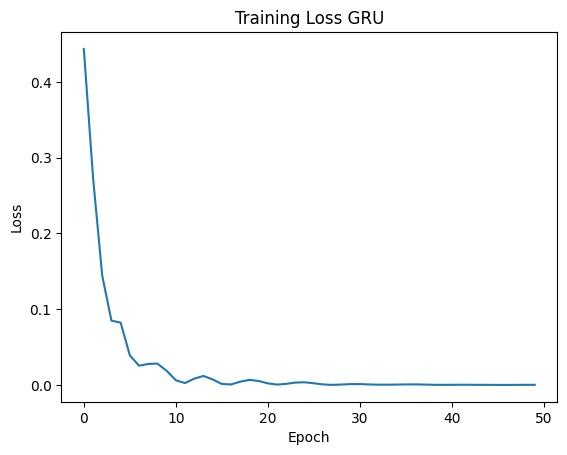

In [6]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss GRU')
plt.show()

# **Prediksi**

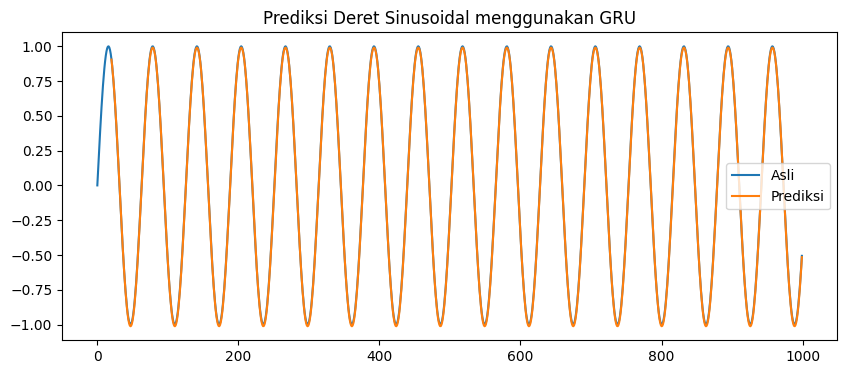

In [7]:
with torch.no_grad():
    preds = model(X).numpy()

plt.figure(figsize=(10,4))
plt.plot(data, label='Asli')
plt.plot(np.arange(seq_length, len(preds)+seq_length), preds, label='Prediksi')
plt.legend()
plt.title('Prediksi Deret Sinusoidal menggunakan GRU')
plt.show()